<img align="left" src="images/GMIT-logo.png" alt="GMIT" width="250"/>                                                      <img align="right" src="images/data-analytics.png" alt="HDipDA" width="300"/>  

# <center>Fundamentals of Data Analysis - Tips Project 2019</center> #

***
**Module Name**: Fundamentals of Data Analysis  
**Module Number**: 52446  
**Student Name**: Yvonne Brady  
**Student ID**: G00376355  
***

_**Note:** For ease of navigation, where markdown cells are not adjacent, there is a link to the next markdown cell ">>>". This will aid in anyone who wants to see the analysis rather than the code to achieve that decisional information. In some instances there is data results or plot displayed in code cells. These will not be skipped over in this manner._

### Description - 30%###
Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter notebook that uses descriptive statistics and plots to describe the tips dataset. This part is worth 30% of your overall mark.

### Regression - 30% ###
To the above jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount, and this part is also worth 30%.

### Analysis - 40% ###
Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those. This part is worth 40%.

## Table of Contents
1. [Introduction](#intro)  
2. [General Description of Dataset](#info)  



## <a name="intro"></a>1.0 Introduction
This project involves the tips dataset that comes as part of the seaborn package. 

<span style='background :yellow' > 
**_Caveat:_** There are no boundaries set for this dataset however which leads to a flawed analysis, see below for details. From what we can ascertain from google searching, the data appears to come from one waiter who recorded information about each tip he received over a period of a few months working in one restaurant. It is on this basis that the analysis was done.  </span>

All caveats aside, in order to start our analysis, we must first import our packages. [>>>](#info)

In [1]:
# First of all import all the packages you need
# The importation of a lot of packages may have adverse affects on the performance of your script
# but this is not important for this dataset and investigation. 
# Should enhanced performance be required, the importation packages may be re-thought. 

import numpy as np # foundation of all data processing packages
import pandas as pd # using dataframes etc
import matplotlib.pyplot as plt # plotting and as a basis for seaborn
import seaborn as sns # fancier plotting and statistics etc
import pandas_profiling # found this - for profiling the dataset initially
from scipy import stats # For statistics
from tabulate import tabulate # To make som etables a bit easier
import sklearn.neighbors as nei
import sklearn.model_selection as mod
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn import metrics

# magic command to allow for easier integration of matplotlib plots in the Jupyter notebook
%matplotlib inline 

In [2]:
# And the dataset itself (also included in this repository)
tips = sns.load_dataset("tips")

In [3]:
# Now have a look at the data
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [4]:
print("The dataset has",tips.shape[0], "rows, each with", tips.shape[1], "attributes - totalling", tips.size, "data values in the dataset.")
print("Over the data collection period, the waiter served", tips['size'].sum(), "customers in",tips.shape[0], "transactions, generating an income of $", tips["total_bill"].sum(), ". ")
print("This resulted in tips totalling $", tips["tip"].sum().round(2), ".")
print("The day breakdown is as follows:")
print(tips.groupby("day").size())

The dataset has 244 rows, each with 7 attributes - totalling 1708 data values in the dataset.
Over the data collection period, the waiter served 627 customers in 244 transactions, generating an income of $ 4827.77 . 
This resulted in tips totalling $ 731.58 .
The day breakdown is as follows:
day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64


In [5]:
# Now have a look at the data - first the initial few rows to see what they look like
tips.head(5) # returns first 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# Then the last few rows as a check to ensure the data has not gone awry in the middle somewhere
tips.tail() # returns last 5 rows

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [7]:
# And finally a random sample to see what else there is in there
tips.sample(5) # returns 5 randomly selected rows

,total_bill,tip,sex,smoker,day,time,size
152,17.26,2.74,Male,No,Sun,Dinner,3
188,18.15,3.50,Female,Yes,Sun,Dinner,3
236,12.60,1.00,Male,Yes,Sat,Dinner,2
87,18.28,4.00,Male,No,Thur,Lunch,2
220,12.16,2.20,Male,Yes,Fri,Lunch,2


In [8]:
tips.isnull().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

## <a name="info"></a>2. General Description of the Dataset  
The dataset itself has 244 rows, each with 7 attributes equating to 1708 data values in total. The recorded attributes were:
- _*total_bill*_ : Total Bill Amount assumed to be US\\$. This is a floating point value.
- _*tip*_ : Tip amount assumed to be US\\$. This is a floating point value.
- _*sex*_ : Gender of bill payer. This is categorical data with values of either male or female.
- _*smoker*_ : Whether they were a smoker or not. This is categorical data with values of either yes or no.
- _*day*_ : What day of the week the transaction occurred. This is categorical data with values spanning between Thurs and Sun.
- _*time*_ : Meal the diners were being served. This is categorical data with values of either lunch or dinner.  

The first, last and random sampling of rows are intact and there no missing values which leads us to believe the dataset is of good quality.  

Over the data collection period, the waiter served 627 customers in 244 transactions, generating an income of \\$4827.77 for the restaurant and \\$731.58 in tips.  

[>>>}()

In [9]:
# Given that the tip is what we are really looking for it makes sense to include it in the dataframe
tips["tipPC"] = 100*tips["tip"]/tips["total_bill"]
tips.describe()

,total_bill,tip,size,tipPC
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


In [10]:
# Create dataframes based on the categories
dinner = tips.loc[tips["time"] == "Dinner"]
lunch = tips.loc[tips["time"] == "Lunch"]
smoker = tips.loc[tips["smoker"] == "Yes"]
nonsmoker = tips.loc[tips["smoker"] == "No"]
male = tips.loc[tips["sex"] == "Male"]
female = tips.loc[tips["sex"] == "Female"]
thurs = tips.loc[tips["day"] == "Thur"]
fri = tips.loc[tips["day"] == "Fri"]
sat = tips.loc[tips["day"] == "Sat"]
sun = tips.loc[tips["day"] == "Sun"]
size1 = tips.loc[tips["size"] == 1]
size2 = tips.loc[tips["size"] == 2]
size3 = tips.loc[tips["size"] == 3]
size4 = tips.loc[tips["size"] == 4]
size5 = tips.loc[tips["size"] == 5]
size6 = tips.loc[tips["size"] == 6]

In [11]:
# Create a table to compare data
dfs =[dinner, lunch, smoker, nonsmoker, male, female, thurs, fri, sat, sun, size1, size2, size3, size4, size5, size6]
cats = ["Meal", "Meal", "Smoking Status", "Smoking Status","Gender", "Gender", "Day", "Day", "Day", "Day", "Party Size",  "Party Size", "Party Size", "Party Size", "Party Size", "Party Size"]
cls = ["Dinner", "Lunch", "Smoker", "Nonsmoker", "Male", "Female", "Thurs", "Fri", "Sat", "Sun", "1", "2", "3", "4", "5", "6"]

table = []
for i in range(0,len(dfs)):
    row = [cats[i], cls[i], dfs[i]["total_bill"].count()]# The number of rows involved
    row.append(dfs[i]["total_bill"].sum().round(2)) # Total bill for this group
    row.append((dfs[i]["total_bill"].sum()/dfs[i]["size"].sum()).round(2))# Total bill per person for this group
    row.append(dfs[i]["tip"].sum().round(2)) # Total tips for this group
    row.append((dfs[i]["tip"].sum()/dfs[i]["size"].sum()).round(2))# Total tips per person for this group
    row.append(((dfs[i]["tip"].sum()/dfs[i]["total_bill"].sum())*100).round(2))# % Tips based on total bill and total tips received for this group
    table.append(row)

hdr = ["Category", "Group", "Count", "Total Bills ($)", "Bill (per person) ($)","Total Tips ($)", "Tips (per person) ($)","Total Tip %"]

summarydf = pd.DataFrame(table, columns = hdr)
summarydf

,Category,Group,Count,Total Bills ($),Bill (per person) ($),Total Tips ($),Tips (per person) ($),Total Tip %
0,Meal,Dinner,176,3660.30,7.91,546.07,1.18,14.92
1,Meal,Lunch,68,1167.47,7.12,185.51,1.13,15.89
2,Smoking Status,Smoker,93,1930.34,8.62,279.81,1.25,14.50
3,Smoking Status,Nonsmoker,151,2897.43,7.19,451.77,1.12,15.59
4,Gender,Male,157,3256.82,7.89,485.07,1.17,14.89
5,Gender,Female,87,1570.95,7.34,246.51,1.15,15.69
6,Day,Thurs,62,1096.33,7.21,171.83,1.13,15.67
7,Day,Fri,19,325.88,8.15,51.96,1.30,15.94
8,Day,Sat,87,1778.40,8.12,260.40,1.19,14.64
9,Day,Sun,76,1627.16,7.53,247.39,1.15,15.20


**General Observation**  
Based on the rudimentary calculations above, it would appear the best tip as a % of total bill is to be found if the waiter serves lunch on a Friday to a non-smoking woman dining on her own. Mind you this particular scenario accounted for exactly $0 in tips, so I guess the conclusion of this part would be - don't rely on generalities!
The most tips however would be obtained by serving a party of 2, non-smokers having dinner on a Saturday where the bill is being paid by a male.

In [12]:
(tips.groupby(["day", "time", "sex", "smoker", "size"])["tip"].sum() 
   .sort_values(ascending=False) 
   .reset_index(name='Total Tips') ).head()

,day,time,sex,smoker,size,Total Tips
0,Sun,Dinner,Male,No,2,56.98
1,Sun,Dinner,Male,No,4,45.84
2,Sat,Dinner,Male,No,2,42.85
3,Thur,Lunch,Male,No,2,40.95
4,Sat,Dinner,Male,Yes,2,39.41


In [13]:
# Just checking which was the most common day and time
(tips.groupby(["day", "time"]).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   )

,day,time,count
0,Sat,Dinner,87
1,Sun,Dinner,76
2,Thur,Lunch,61
3,Fri,Dinner,12
4,Fri,Lunch,7
5,Thur,Dinner,1


In [14]:
# Just checking which was the most common scenario - Sunday dinner with two non-smoking males apparently
(tips.groupby(["day", "time", "sex", "smoker", "size"]).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   ).head()

,day,time,sex,smoker,size,count
0,Sun,Dinner,Male,No,2,22
1,Thur,Lunch,Female,No,2,18
2,Sat,Dinner,Male,Yes,2,17
3,Sat,Dinner,Male,No,2,17
4,Thur,Lunch,Male,No,2,16


In [15]:
tips.describe()

,total_bill,tip,size,tipPC
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


In [16]:
tips.groupby("day").describe()

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip            ... size      tipPC                                  \
     count      mean  ...  75%  max count       mean       std        min   
day                   ...                                                   
Thur  62.0  2.771452  ...  2.0  6.0  62.0  16.127563  3.865182   7.296137   
Fri   19.0  2.734737  ...  2.0  4.0  19.0  16.991303  4.766531  10.355540   
Sat   87.0  2.993103  ...  3.0  5.0  87.0  15.315172  5.129259   3.563814   
Sun   76.0  3.255132  ...  4.0  6.0  76.0  16.689729  8.473889   5.944673   

                                                  
            25%        50%        75%        max  
day                                               
Thur  13.820958  15.384615  19.268675  26.631158  
Fri   13.373871  15.562472  19.663729  26.348039  
Sat   12.386329  15.183246  18.827082  32.573290  
Sun   11.998208  16.110332  18.788908  71.034483  

[4 rows x 32 columns]

In [17]:
# Found this and thought it was worth trying ...
profile = pandas_profiling.ProfileReport(tips)
profile

This is a really interesting summary of the data - with lots of information, both numeric and graphical contained within it.

## Start Plotting ##
First off we will look at the variables individually.  
  
_Note: This is preliminary - I will almost certainly not include everything here in final submission._

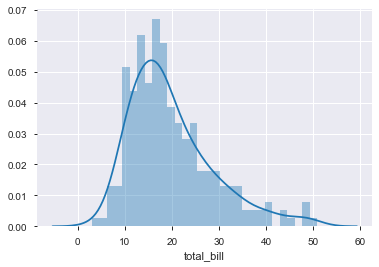

In [18]:
sns.distplot(tips['total_bill'],kde=True,bins=30)

Looking at the histogram displayed the bulk of the bills fell between the \\$10 to \\$25 bracket.

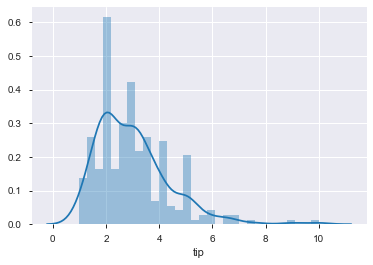

In [19]:
sns.distplot(tips['tip'],kde=True,bins=30)

And the bulk of the tips were between \\$1 and \\$3.50, with more outliers than in the bill amounts. Unlike the bill amounts though the outliers are more prevalent on the upward range.

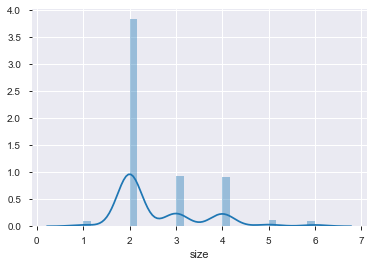

In [20]:
sns.distplot(tips['size'],kde=True,bins=30)

By far the most prevalent party size was 2 people.

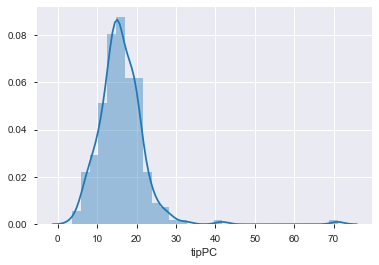

In [21]:
sns.distplot(tips["tipPC"],kde=True,bins=30)

As we can see from the plot above, most of the tips (as % of the total bill) fall between 10 - 20%, peaking at around the 15%.

(array([ 1.,  0.,  1.,  1.,  3.,  5., 10., 13., 12., 15., 10., 12., 18.,
         7., 23.,  9., 12.,  7.,  9., 10.,  5.,  5.,  9.,  8.,  3.,  2.,
         3.,  4.,  4.,  1.,  3.,  3.,  3.,  2.,  1.,  1.,  0.,  3.,  1.,
         1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([ 4.07  ,  5.2048,  6.3396,  7.4744,  8.6092,  9.744 , 10.8788,
        12.0136, 13.1484, 14.2832, 15.418 , 16.5528, 17.6876, 18.8224,
        19.9572, 21.092 , 22.2268, 23.3616, 24.4964, 25.6312, 26.766 ,
        27.9008, 29.0356, 30.1704, 31.3052, 32.44  , 33.5748, 34.7096,
        35.8444, 36.9792, 38.114 , 39.2488, 40.3836, 41.5184, 42.6532,
        43.788 , 44.9228, 46.0576, 47.1924, 48.3272, 49.462 , 50.5968,
        51.7316, 52.8664, 54.0012, 55.136 , 56.2708, 57.4056, 58.5404,
        59.6752, 60.81  ]),
 <a list of 50 Patch objects>)

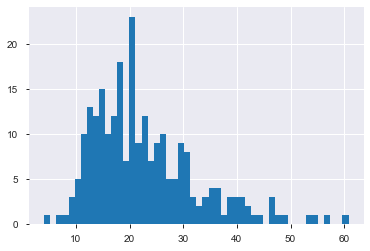

In [22]:
plt.hist((tips['tip']+tips["total_bill"])%100, 50)

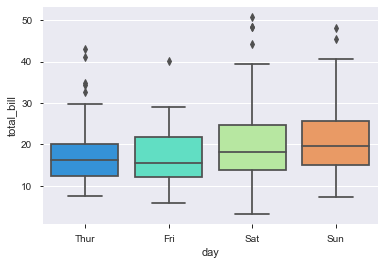

In [23]:
sns.boxplot(x='day',y='total_bill',data=tips,palette='rainbow')

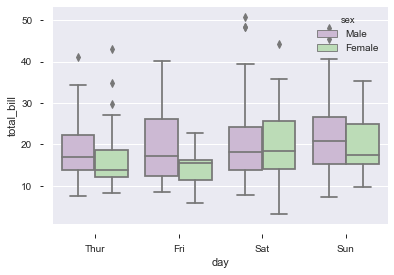

In [24]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

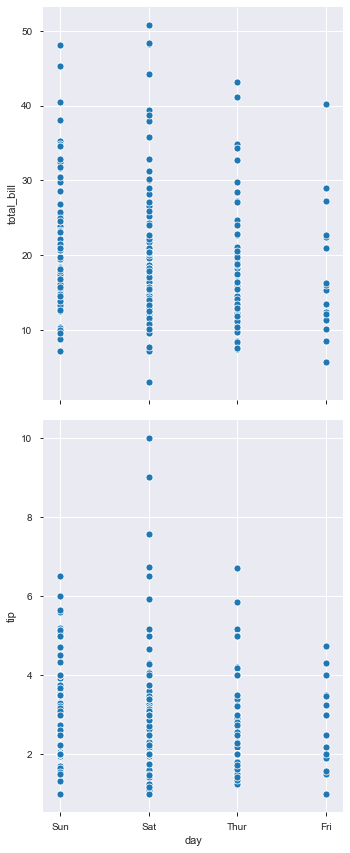

In [25]:
# Plotting a simple Jointplot:
#sns.pairplot(data=tips, hue='sex', palette='icefire', x_vars=['total_bill','size'], y_vars=['tip'], size=6, aspect=.85, kind='reg')
sns.pairplot(data=tips, x_vars=['day'], y_vars=['total_bill','tip'], size=6, aspect=.85, kind='scatter')

## Plotting the Categorical Data ##

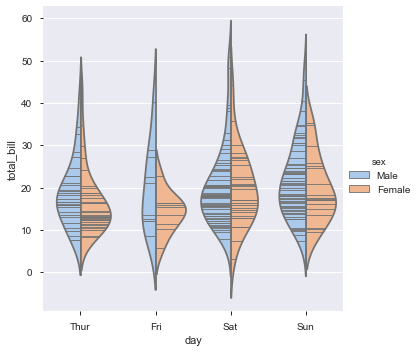

In [26]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

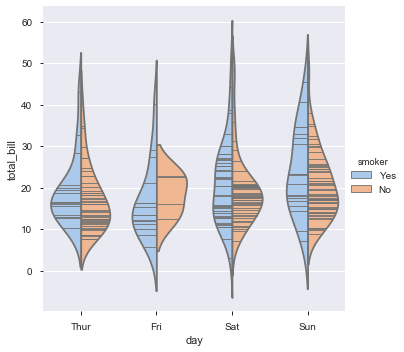

In [27]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

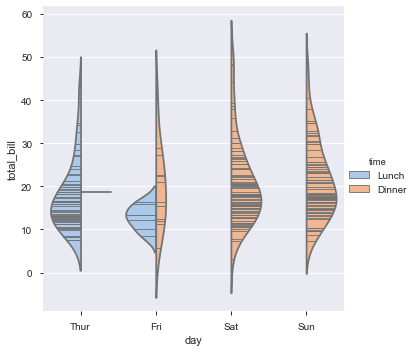

In [28]:
sns.catplot(x="day", y="total_bill", hue="time",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

## Bi-Variate Plotting ##

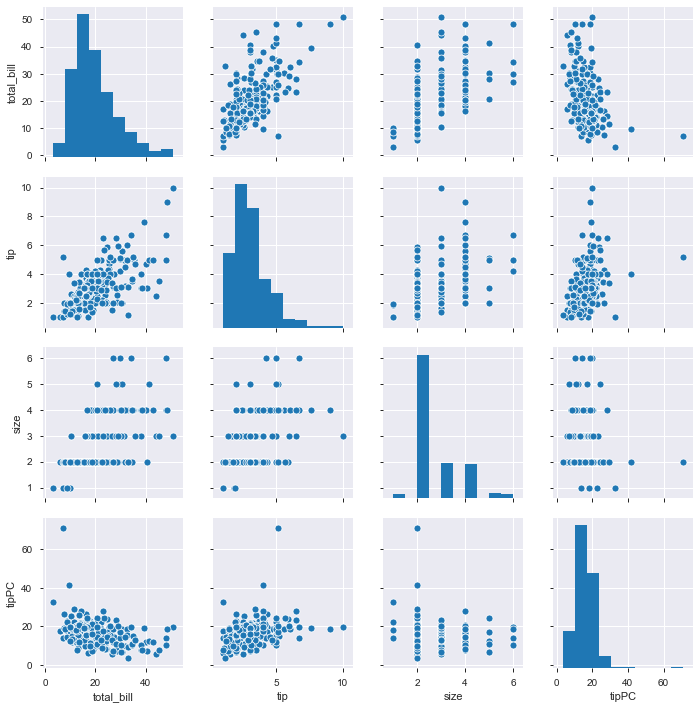

In [29]:
sns.pairplot(tips)

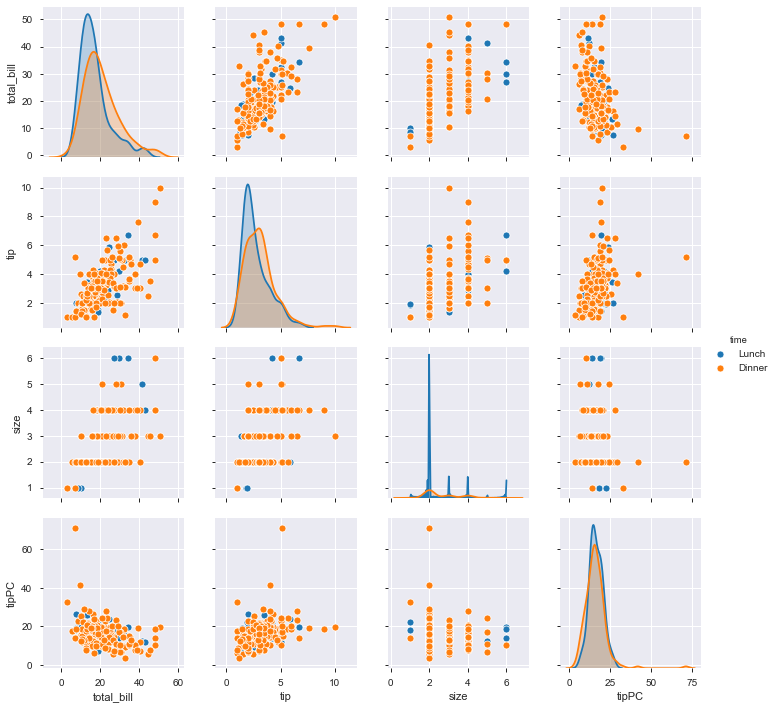

In [30]:
sns.pairplot(tips, hue = "time")

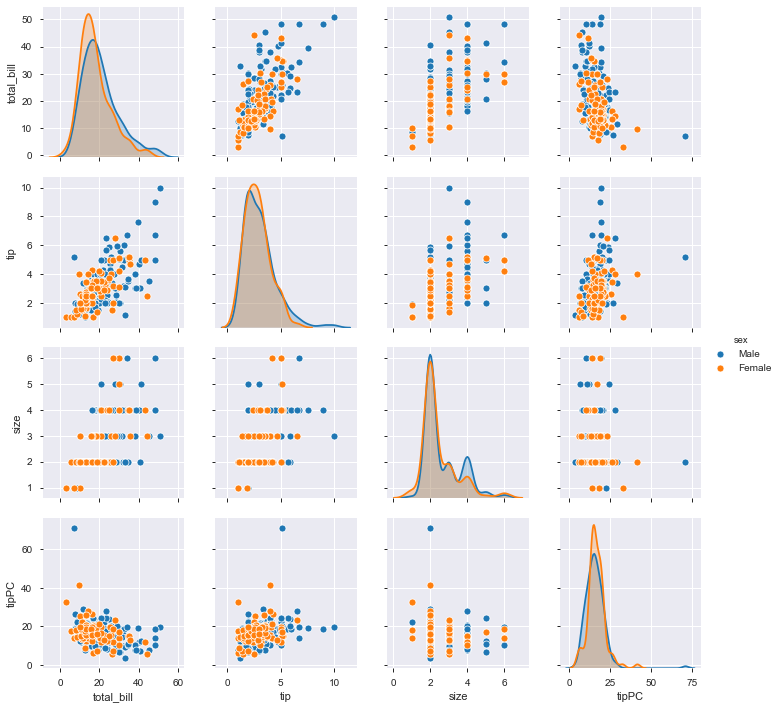

In [31]:
sns.pairplot(tips, hue = "sex")

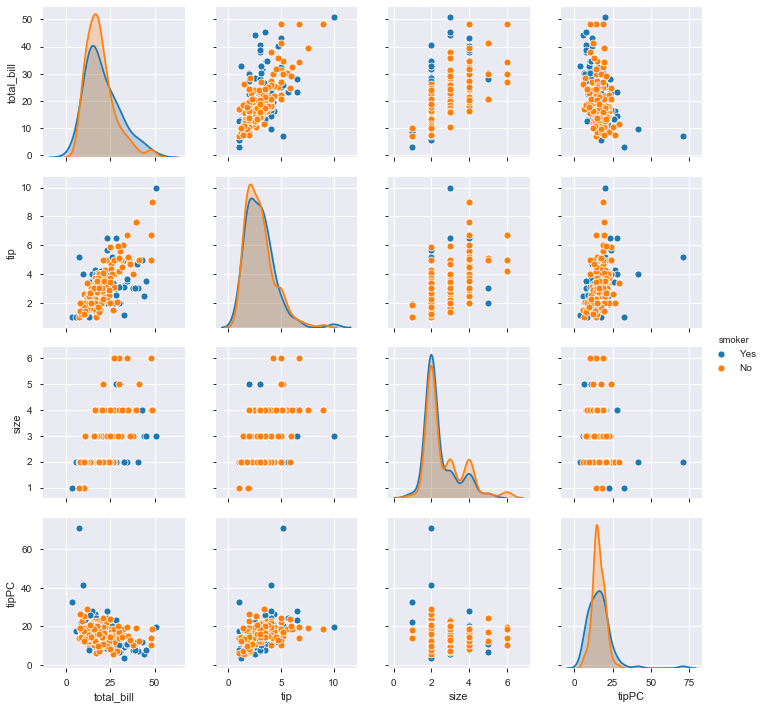

In [32]:
sns.pairplot(tips, hue = "smoker")

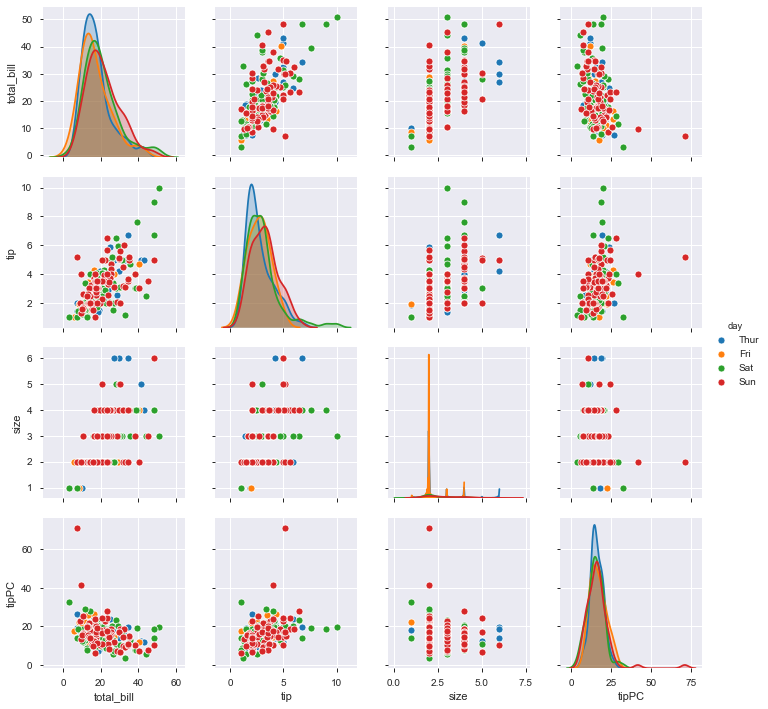

In [33]:
sns.pairplot(tips, hue = "day")

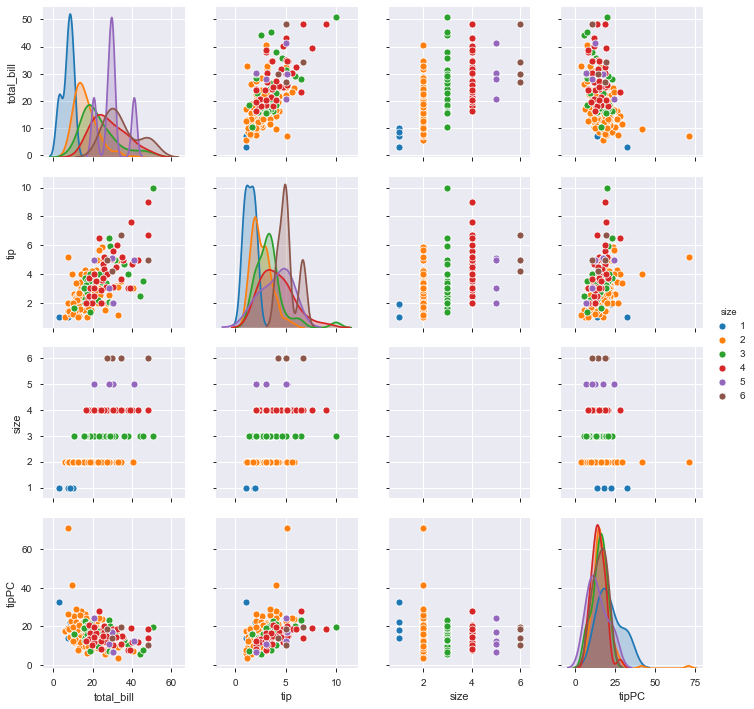

In [34]:
sns.pairplot(tips, hue = "size")

In [35]:
# Get the regression line using all the data
t_slope, t_intercept, t_r2, t_p, t_stdErr = stats.linregress(tips["total_bill"], tips["tip"])

In [36]:
# See how good a fit it is
t_r2

0.6757341092113641

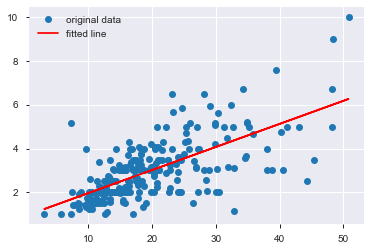

In [37]:
# Plot both the raw data and the "best fit" line
plt.plot(tips["total_bill"], tips["tip"], 'o', label='original data')
plt.plot(tips["total_bill"], t_intercept + t_slope*tips["total_bill"], 'r', label='fitted line')
plt.legend()
plt.show()

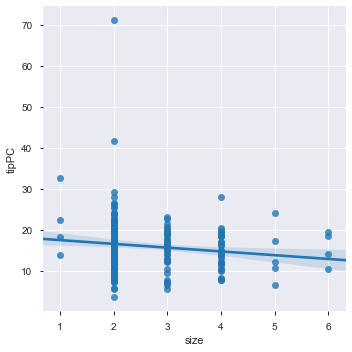

In [38]:
# Another view on the data 
sns.lmplot(x="size", y="tipPC", data=tips)

In [39]:
# Time of day comparison
# Get the regression line using all the data
d_slope, d_intercept, d_r2, d_p, d_stdErr = stats.linregress(dinner["total_bill"], dinner["tip"])
l_slope, l_intercept, l_r2, l_p, l_stdErr = stats.linregress(lunch["total_bill"], lunch["tip"])
print("r^2 dinner (Dataset size", len(dinner.index), "rows) = ", d_r2)
print("r^2 lunch (Dataset size", len(lunch.index), "rows) = ", l_r2)

r^2 dinner (Dataset size 176 rows) =  0.632871246985668
r^2 lunch (Dataset size 68 rows) =  0.8054238363495536


In [40]:
# Check if the time values are statistically different
print("T-Test Results")
print("Total Bill results:", stats.ttest_ind(dinner['total_bill'], lunch['total_bill']))
print("Tip results:", stats.ttest_ind(dinner['tip'], lunch['tip']))
print("Party Size results:", stats.ttest_ind(dinner['size'], lunch['size']))
print("% Tip of Total Bill results:", stats.ttest_ind(dinner['tipPC'], lunch['tipPC']))

T-Test Results
Total Bill results: Ttest_indResult(statistic=2.8976375218366424, pvalue=0.004104621407595674)
Tip results: Ttest_indResult(statistic=1.9062569301202392, pvalue=0.05780153475171558)
Party Size results: Ttest_indResult(statistic=1.6173673798749002, pvalue=0.1071016933042903)
% Tip of Total Bill results: Ttest_indResult(statistic=-0.5278867814179381, pvalue=0.5980616074405454)


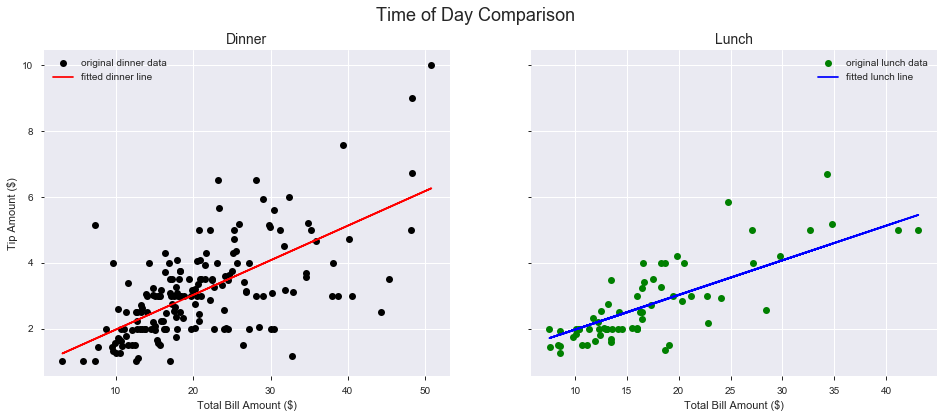

In [41]:
plt.rcParams['figure.figsize'] = [16, 6]

# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(dinner["total_bill"], dinner["tip"], 'ko', label='original dinner data')
ax1.plot(dinner["total_bill"], t_intercept + t_slope*dinner["total_bill"], 'r', label='fitted dinner line')
ax1.legend()
ax2.plot(lunch["total_bill"], lunch["tip"], 'go', label='original lunch data')
ax2.plot(lunch["total_bill"], t_intercept + t_slope*lunch["total_bill"], 'b', label='fitted lunch line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
fig.suptitle('Time of Day Comparison', fontsize=18)
ax1.set_title('Dinner',fontsize=14)
ax2.set_title('Lunch',fontsize=14)
plt.show()

In [42]:
# Smoker comparison
# Get the regression line using all the data
s_slope, s_intercept, s_r2, s_p, s_stdErr = stats.linregress(smoker["total_bill"], smoker["tip"])
ns_slope, ns_intercept, ns_r2, ns_p, ns_stdErr = stats.linregress(nonsmoker["total_bill"], nonsmoker["tip"])
print("r^2 smokers (Dataset size", len(smoker.index), "rows) = ", s_r2)
print("r^2 non-smokers (Dataset size", len(nonsmoker.index), "rows) = ", ns_r2)

r^2 smokers (Dataset size 93 rows) =  0.48821794116281036
r^2 non-smokers (Dataset size 151 rows) =  0.8221826257050836


In [43]:
# Check if the smoking status values are statistically different
print("T-Test Results")
print("Total results:", stats.ttest_ind(smoker['total_bill'], nonsmoker['total_bill']))
print("Tip results:", stats.ttest_ind(smoker['tip'], nonsmoker['tip']))
print("Party Size results:", stats.ttest_ind(smoker['size'], nonsmoker['size']))
print("% Tip of Total Bill results:", stats.ttest_ind(smoker['tipPC'], nonsmoker['tipPC']))

T-Test Results
Total results: Ttest_indResult(statistic=1.3384363834700073, pvalue=0.1820103288430244)
Tip results: Ttest_indResult(statistic=0.09222805186888201, pvalue=0.9265931522244976)
Party Size results: Ttest_indResult(statistic=-2.0903882645117493, pvalue=0.03762676724560343)
% Tip of Total Bill results: Ttest_indResult(statistic=0.4796693002669833, pvalue=0.6318957776878545)


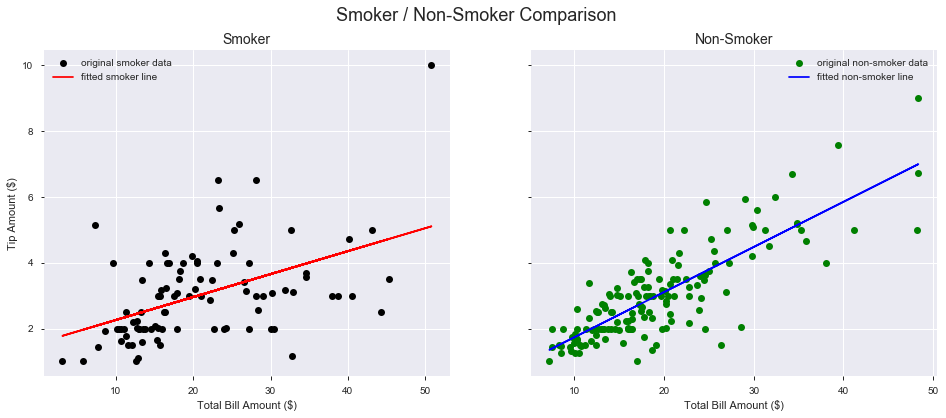

In [44]:
plt.rcParams['figure.figsize'] = [16, 6]
#fig=plt.figure(figsize=(5, 10),  facecolor='w', edgecolor='k')
# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(smoker["total_bill"], smoker["tip"], 'ko', label='original smoker data')
ax1.plot(smoker["total_bill"], s_intercept + s_slope*smoker["total_bill"], 'r', label='fitted smoker line')
ax1.legend()
ax2.plot(nonsmoker["total_bill"], nonsmoker["tip"], 'go', label='original non-smoker data')
ax2.plot(nonsmoker["total_bill"], ns_intercept + ns_slope*nonsmoker["total_bill"], 'b', label='fitted non-smoker line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
fig.suptitle('Smoker / Non-Smoker Comparison', fontsize=18)
ax1.set_title('Smoker',fontsize=14)
ax2.set_title('Non-Smoker',fontsize=14)
plt.show()

In [45]:
# Gender comparison
# Get the regression line using all the data
m_slope, m_intercept, m_r2, m_p, m_stdErr = stats.linregress(male["total_bill"], male["tip"])
f_slope, f_intercept, f_r2, f_p, f_stdErr = stats.linregress(female["total_bill"], female["tip"])
print("r^2 male (Dataset size", len(male.index), "rows) = ", m_r2)
print("r^2 female (Dataset size", len(female.index), "rows) = ", f_r2)

r^2 male (Dataset size 157 rows) =  0.6697529858911426
r^2 female (Dataset size 87 rows) =  0.6829992918122414


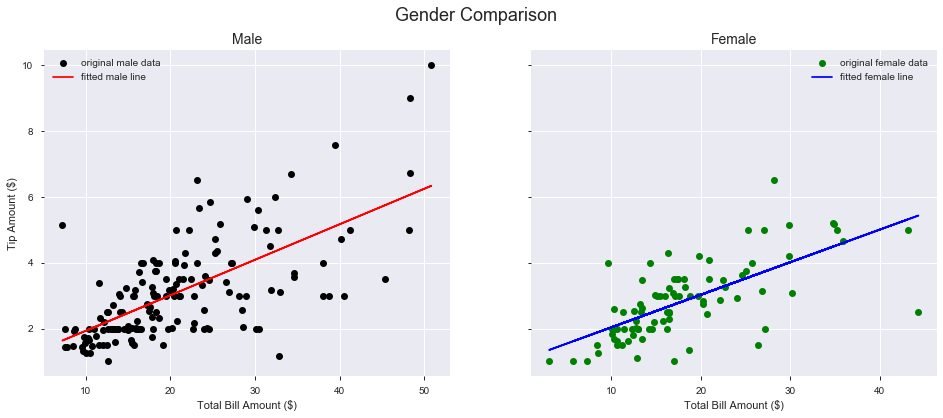

In [46]:
plt.rcParams['figure.figsize'] = [16, 6]
#fig=plt.figure(figsize=(5, 10),  facecolor='w', edgecolor='k')
# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(male["total_bill"], male["tip"], 'ko', label='original male data')
ax1.plot(male["total_bill"], m_intercept + m_slope*male["total_bill"], 'r', label='fitted male line')
ax1.legend()
ax2.plot(female["total_bill"], female["tip"], 'go', label='original female data')
ax2.plot(female["total_bill"], f_intercept + f_slope*female["total_bill"], 'b', label='fitted female line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
fig.suptitle('Gender Comparison', fontsize=18)
ax1.set_title('Male',fontsize=14)
ax2.set_title('Female',fontsize=14)
plt.show()

In [47]:
# Check if the gender values are statistically different
print("T-Test Results")
print("Total Bill results:", stats.ttest_ind(male['total_bill'], female['total_bill']))
print("Tip results:", stats.ttest_ind(male['tip'], female['tip']))
print("Party Size results:", stats.ttest_ind(male['size'], female['size']))
print("% Tip of Total Bill results:", stats.ttest_ind(male['tipPC'], female['tipPC']))

T-Test Results
Total Bill results: Ttest_indResult(statistic=2.2777940289803134, pvalue=0.0236116668468594)
Tip results: Ttest_indResult(statistic=1.3878597054212687, pvalue=0.16645623503456763)
Party Size results: Ttest_indResult(statistic=1.3458856268018975, pvalue=0.1795988999141355)
% Tip of Total Bill results: Ttest_indResult(statistic=-1.0833972270478005, pvalue=0.2797103849605485)


In [48]:
# Party Size comparison
# Get the regression line using all the data
s1_slope, s1_intercept, s1_r2, s1_p, s1_stdErr = stats.linregress(size1["total_bill"], size1["tip"])
s2_slope, s2_intercept, s2_r2, s2_p, s2_stdErr = stats.linregress(size2["total_bill"], size2["tip"])
s3_slope, s3_intercept, s3_r2, s3_p, s3_stdErr = stats.linregress(size3["total_bill"], size3["tip"])
s4_slope, s4_intercept, s4_r2, s4_p, s4_stdErr = stats.linregress(size4["total_bill"], size4["tip"])
s5_slope, s5_intercept, s5_r2, s5_p, s5_stdErr = stats.linregress(size5["total_bill"], size5["tip"])
s6_slope, s6_intercept, s6_r2, s6_p, s6_stdErr = stats.linregress(size6["total_bill"], size6["tip"])
print("r^2 Party Size 1 (Dataset size", len(size1.index), "rows) = ", s1_r2)
print("r^2 Party Size 2 (Dataset size", len(size2.index), "rows) = ", s2_r2)
print("r^2 Party Size 3 (Dataset size", len(size3.index), "rows) = ", s3_r2)
print("r^2 Party Size 4 (Dataset size", len(size4.index), "rows) = ", s4_r2)
print("r^2 Party Size 5 (Dataset size", len(size5.index), "rows) = ", s5_r2)
print("r^2 Party Size 6 (Dataset size", len(size6.index), "rows) = ", s6_r2)

r^2 Party Size 1 (Dataset size 4 rows) =  0.7819380610281642
r^2 Party Size 2 (Dataset size 156 rows) =  0.4811509958463354
r^2 Party Size 3 (Dataset size 38 rows) =  0.5897440237023541
r^2 Party Size 4 (Dataset size 37 rows) =  0.6760879540843564
r^2 Party Size 5 (Dataset size 5 rows) =  0.062186249409241744
r^2 Party Size 6 (Dataset size 4 rows) =  0.10535541767159408


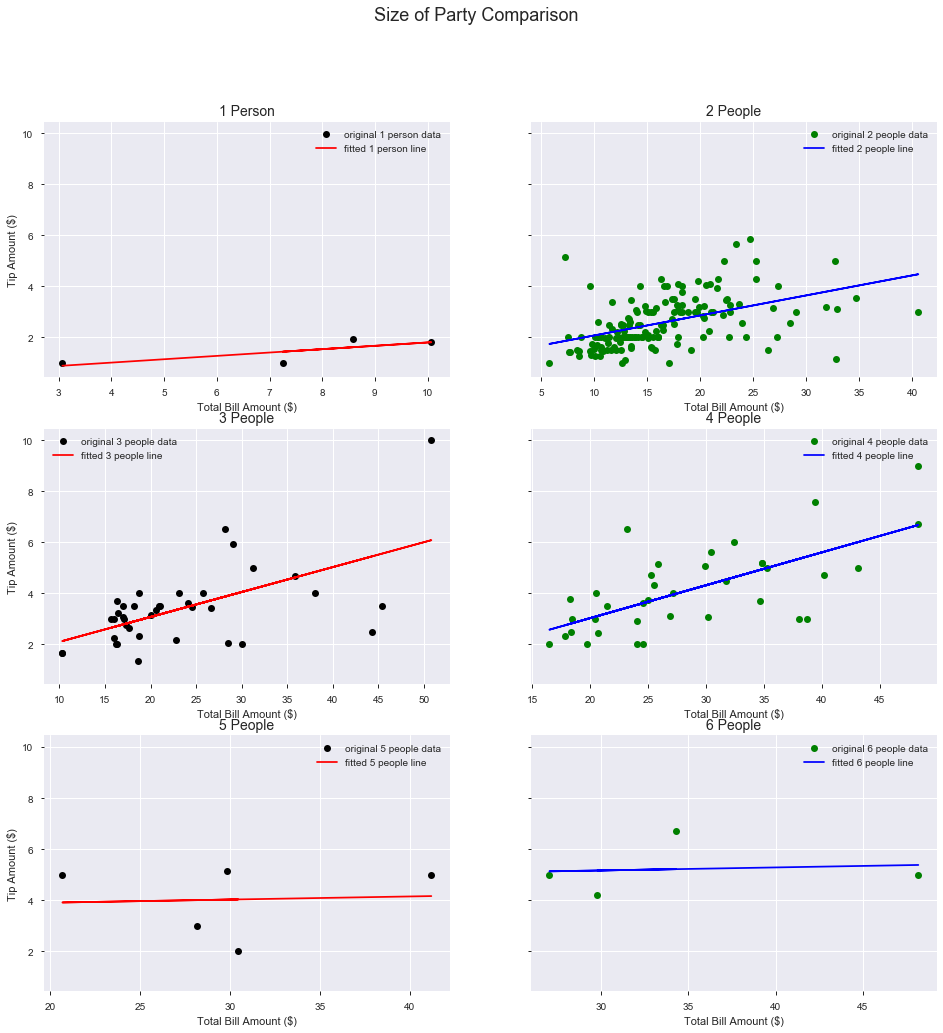

In [49]:
plt.rcParams['figure.figsize'] = [16,16]

# Plot both the raw data and the "best fit" lines
fig, ((ax1, ax2), (ax3, ax4), ( ax5, ax6)) = plt.subplots(3, 2, sharey=True)

ax1.plot(size1["total_bill"], size1["tip"], 'ko', label='original 1 person data')
ax1.plot(size1["total_bill"], s1_intercept + s1_slope*size1["total_bill"], 'r', label='fitted 1 person line')
ax1.legend()
ax2.plot(size2["total_bill"], size2["tip"], 'go', label='original 2 people data')
ax2.plot(size2["total_bill"], s2_intercept + s2_slope*size2["total_bill"], 'b', label='fitted 2 people line')
ax2.legend()
ax3.plot(size3["total_bill"], size3["tip"], 'ko', label='original 3 people data')
ax3.plot(size3["total_bill"], s3_intercept + s3_slope*size3["total_bill"], 'r', label='fitted 3 people line')
ax3.legend()
ax4.plot(size4["total_bill"], size4["tip"], 'go', label='original 4 people data')
ax4.plot(size4["total_bill"], s4_intercept + s4_slope*size4["total_bill"], 'b', label='fitted 4 people line')
ax4.legend()
ax5.plot(size5["total_bill"], size5["tip"], 'ko', label='original 5 people data')
ax5.plot(size5["total_bill"], s5_intercept + s5_slope*size5["total_bill"], 'r', label='fitted 5 people line')
ax5.legend()
ax6.plot(size6["total_bill"], size6["tip"], 'go', label='original 6 people data')
ax6.plot(size6["total_bill"], s6_intercept + s6_slope*size6["total_bill"], 'b', label='fitted 6 people line')
ax6.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax3.set_xlabel('Total Bill Amount ($)')
ax4.set_xlabel('Total Bill Amount ($)')
ax5.set_xlabel('Total Bill Amount ($)')
ax6.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
ax3.set_ylabel('Tip Amount ($)')
ax5.set_ylabel('Tip Amount ($)')
fig.suptitle('Size of Party Comparison', fontsize=18)
ax1.set_title('1 Person',fontsize=14)
ax2.set_title('2 People',fontsize=14)
ax3.set_title('3 People',fontsize=14)
ax4.set_title('4 People',fontsize=14)
ax5.set_title('5 People',fontsize=14)
ax6.set_title('6 People',fontsize=14)
plt.show()

In [50]:
# Check if the time values are statistically different
print("ANOVA Results")
print("Total Bill Results", stats.f_oneway(size1['total_bill'], size2['total_bill'], size3['total_bill'], size4['total_bill'], size5['total_bill'], size6['total_bill']))
print("Tip Results", stats.f_oneway(size1['tip'], size2['tip'], size3['tip'], size4['tip'], size5['tip'], size6['tip']))
print("% Tip of Total Bill Results", stats.f_oneway(size1['tipPC'], size2['tipPC'], size3['tipPC'], size4['tipPC'], size5['tipPC'], size6['tipPC']))

ANOVA Results
Total Bill Results F_onewayResult(statistic=28.09461523749822, pvalue=2.434919254210166e-22)
Tip Results F_onewayResult(statistic=15.746330672727057, pvalue=2.1694633916208174e-13)
% Tip of Total Bill Results F_onewayResult(statistic=1.60066113891635, pvalue=0.16064144658923415)


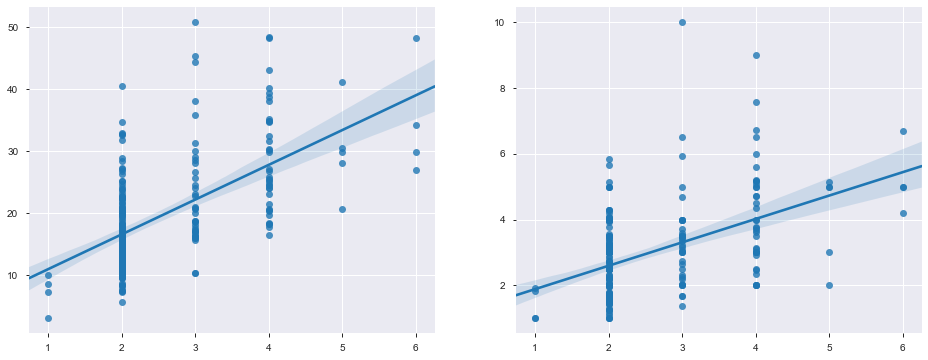

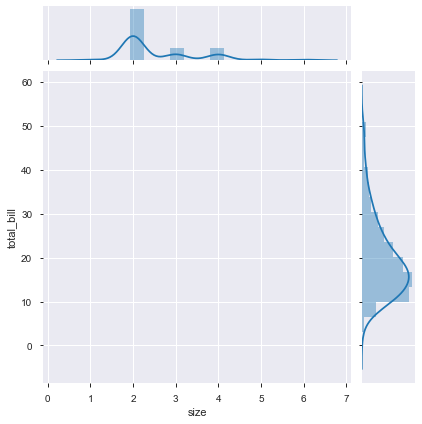

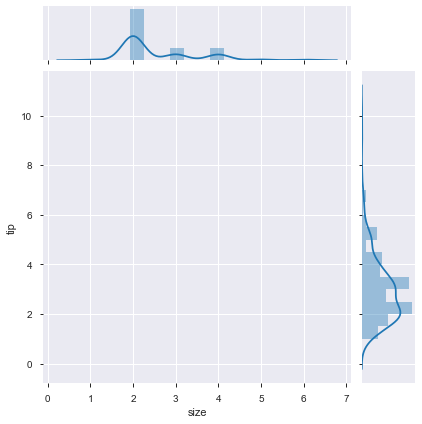

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.jointplot(x = 'size', y = 'total_bill', data = tips, kind = 'reg', ax = ax1)
sns.jointplot(x = 'size', y = 'tip', data = tips, kind = 'reg', ax = ax2)

In [52]:
table = [["Smokers", len(smoker.index), s_slope, s_intercept, s_r2, s_p, s_stdErr], \
         ["Non-Smokers", len(nonsmoker.index), ns_slope, ns_intercept, ns_r2, ns_p, ns_stdErr], \
         ["Male", len(male.index), m_slope, m_intercept, m_r2, m_p, m_stdErr], \
         ["Female", len(female.index), f_slope, f_intercept, f_r2, f_p, f_stdErr], \
         ["Lunch", len(lunch.index), l_slope, l_intercept, l_r2, l_p, l_stdErr], \
         ["Dinner", len(dinner.index), d_slope, d_intercept, d_r2, d_p, d_stdErr], \
         ["Party of 1", len(size1.index), s1_slope, s1_intercept, s1_r2, s1_p, s1_stdErr], \
         ["Party of 2", len(size2.index), s2_slope, s2_intercept, s2_r2, s2_p, s2_stdErr], \
         ["Party of 3", len(size3.index), s3_slope, s3_intercept, s3_r2, s3_p, s3_stdErr], \
         ["Party of 4", len(size4.index), s4_slope, s4_intercept, s4_r2, s4_p, s4_stdErr], \
         ["Party of 5", len(size5.index), s5_slope, s5_intercept, s5_r2, s5_p, s5_stdErr], \
         ["Party of 6", len(size6.index), s6_slope, s6_intercept, s6_r2, s6_p, s6_stdErr]]
hdr = ["Category", "Sample Size", "Slope", "Intercept", "R^2 Value", "P-Value", "Std Error"]
print(tabulate(table, headers = hdr,  tablefmt="grid"))

+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Category    |   Sample Size |     Slope |   Intercept |   R^2 Value |     P-Value |   Std Error |
+=============+===============+===========+=============+=============+=============+=============+
| Smokers     |            93 | 0.0695902 |    1.56427  |   0.488218  | 6.89401e-07 |  0.0130404  |
+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Non-Smokers |           151 | 0.137156  |    0.360069 |   0.822183  | 2.72556e-38 |  0.00777922 |
+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Male        |           157 | 0.107861  |    0.852148 |   0.669753  | 8.75758e-22 |  0.00960568 |
+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Female      |            87 | 0.0988779 |    1.04802  |   0.682999  | 3.15953e-13 |  0.0114694  |


In [53]:
# Size comparison
# Get the regression line using all the data
bs_slope, bs_intercept, bs_r2, bs_p, bs_stdErr = stats.linregress(tips["total_bill"], tips["size"])
ts_slope, ts_intercept, ts_r2, ts_p, ts_stdErr = stats.linregress(tips["tip"], tips["size"])
print("r^2 Size vs Total Bill = ", bs_r2)
print("r^2 Size vs Tip = ", ts_r2)

r^2 Size vs Total Bill =  0.5983151309049023
r^2 Size vs Tip =  0.4892987752303577


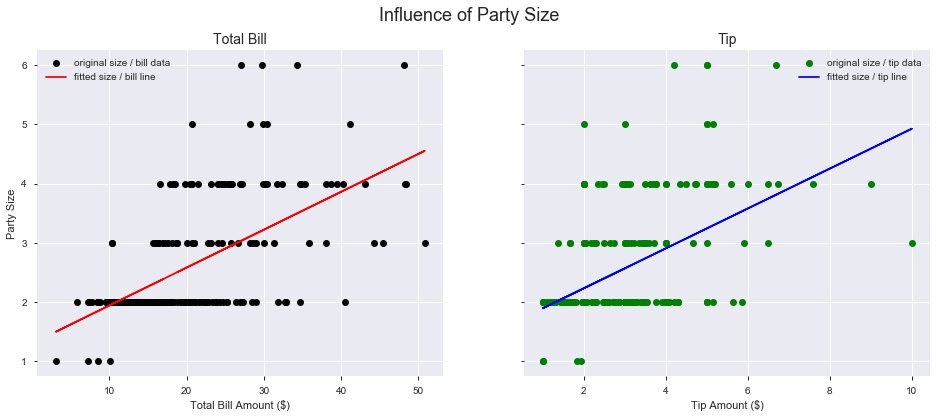

In [54]:
plt.rcParams['figure.figsize'] = [16, 6]
#fig=plt.figure(figsize=(5, 10),  facecolor='w', edgecolor='k')
# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(tips["total_bill"], tips["size"], 'ko', label='original size / bill data')
ax1.plot(tips["total_bill"], bs_intercept + bs_slope*tips["total_bill"], 'r', label='fitted size / bill line')
ax1.legend()
ax2.plot(tips["tip"], tips["size"], 'go', label='original size / tip data')
ax2.plot(tips["tip"], ts_intercept + ts_slope*tips["tip"], 'b', label='fitted size / tip line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Tip Amount ($)')
ax1.set_ylabel('Party Size')
fig.suptitle('Influence of Party Size', fontsize=18)
ax1.set_title('Total Bill',fontsize=14)
ax2.set_title('Tip',fontsize=14)
plt.show()

Looking at how the party size influences both the total bill and the tip - it is clear that the tip amount does not have as good correlation with the party size as the total bill amount does. 

r^2 Size vs % Tip =  -0.1428596006931238


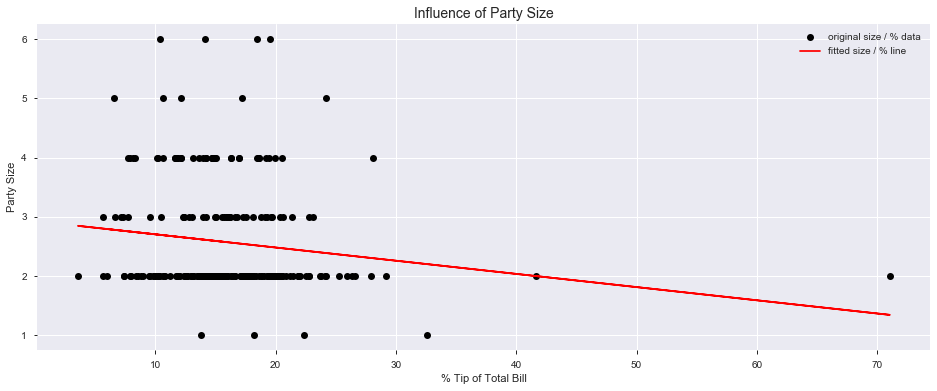

In [55]:
# Size comparison
# Get the regression line using all the data
rs_slope, rs_intercept, rs_r2, rs_p, rs_stdErr = stats.linregress(tips["tipPC"], tips["size"])
print("r^2 Size vs % Tip = ", rs_r2)

plt.rcParams['figure.figsize'] = [16, 6]
#fig=plt.figure(figsize=(5, 10),  facecolor='w', edgecolor='k')
# Plot both the raw data and the "best fit" lines

plt.plot(tips["tipPC"], tips["size"], 'ko', label='original size / % data')
plt.plot(tips["tipPC"], rs_intercept + rs_slope*tips["tipPC"], 'r', label='fitted size / % line')
plt.legend()

# Set labels
plt.xlabel('% Tip of Total Bill')
plt.ylabel('Party Size')
plt.title('Influence of Party Size',fontsize=14)
plt.show()

In [56]:
# Divide the dataset into inputs and outputs
# Inputs = the data we know
# Output = what we are looking for
inputs_tb = tips[['total_bill']]
outputs_tb = tips['tip']
# Build the neural network
model_tb = Sequential()
model_tb.add(Dense(25, input_dim=inputs_tb.shape[1], activation='relu')) # Hidden 1
model_tb.add(Dense(10, activation='relu')) # Hidden 2
model_tb.add(Dense(1)) # Output
model_tb.compile(loss='mean_squared_error', optimizer='adam')
model_tb.fit(inputs_tb,outputs_tb,verbose=2,epochs=100)

Train on 244 samples
Epoch 1/100
244/244 - 0s - loss: 6.8541
Epoch 2/100
244/244 - 0s - loss: 2.2028
Epoch 3/100
244/244 - 0s - loss: 1.2548
Epoch 4/100
244/244 - 0s - loss: 1.4490
Epoch 5/100
244/244 - 0s - loss: 1.3207
Epoch 6/100
244/244 - 0s - loss: 1.2216
Epoch 7/100
244/244 - 0s - loss: 1.2186
Epoch 8/100
244/244 - 0s - loss: 1.2122
Epoch 9/100
244/244 - 0s - loss: 1.1951
Epoch 10/100
244/244 - 0s - loss: 1.1919
Epoch 11/100
244/244 - 0s - loss: 1.1876
Epoch 12/100
244/244 - 0s - loss: 1.1836
Epoch 13/100
244/244 - 0s - loss: 1.1848
Epoch 14/100
244/244 - 0s - loss: 1.1770
Epoch 15/100
244/244 - 0s - loss: 1.1730
Epoch 16/100
244/244 - 0s - loss: 1.1710
Epoch 17/100
244/244 - 0s - loss: 1.1725
Epoch 18/100
244/244 - 0s - loss: 1.1635
Epoch 19/100
244/244 - 0s - loss: 1.1595
Epoch 20/100
244/244 - 0s - loss: 1.1564
Epoch 21/100
244/244 - 0s - loss: 1.1511
Epoch 22/100
244/244 - 0s - loss: 1.1575
Epoch 23/100
244/244 - 0s - loss: 1.1504
Epoch 24/100
244/244 - 0s - loss: 1.1359
Epoc

In [57]:
pred_tb = model_tb.predict(inputs_tb)
print("Shape: {}".format(pred_tb.shape))
print(pred_tb)

Shape: (244, 1)
[[2.6402788]
 [1.9324354]
 [3.068178 ]
 [3.3523803]
 [3.449242 ]
 [3.5237515]
 [1.7653205]
 [3.692996 ]
 [2.432716 ]
 [2.4050405]
 [1.9249843]
 [4.584985 ]
 [2.4731636]
 [2.793556 ]
 [2.4103627]
 [3.1288502]
 [1.9313709]
 [2.565769 ]
 [2.6381497]
 [3.029859 ]
 [2.7392697]
 [2.991539 ]
 [2.510419 ]
 [5.027786 ]
 [2.941511 ]
 [2.7275617]
 [2.2549565]
 [2.182575 ]
 [3.1416235]
 [2.9234157]
 [1.8483459]
 [2.7850409]
 [2.4348447]
 [3.034116 ]
 [2.7243683]
 [3.392828 ]
 [2.567898 ]
 [2.633892 ]
 [2.8212311]
 [4.1602783]
 [2.539158 ]
 [2.6903064]
 [2.3156285]
 [1.8621833]
 [4.0676737]
 [2.7786536]
 [3.198038 ]
 [4.2805586]
 [3.8707547]
 [2.7520435]
 [2.1666093]
 [1.9271132]
 [4.537085 ]
 [1.8898582]
 [3.5524912]
 [2.9063852]
 [4.8777013]
 [3.6429682]
 [2.0282338]
 [5.9698043]
 [2.991539 ]
 [2.3017912]
 [2.0048163]
 [2.7786539]
 [2.7041442]
 [2.9691858]
 [2.5827997]
 [1.1485432]
 [2.9851525]
 [2.429522 ]
 [2.1112587]
 [2.6487937]
 [3.6908665]
 [3.5226874]
 [2.3997185]
 [1.95053

In [58]:
# Measure RMSE error.  RMSE is common for regression.
score_tb = np.sqrt(metrics.mean_squared_error(pred_tb,outputs_tb))
print(f"Final score (RMSE): {score_tb}")

Final score (RMSE): 1.0197121117183094


In [59]:
# Sample predictions
for i in range(10):
    #    print(f"{i+1}. Car name: {cars[i]}, MPG: {y[i]}, predicted MPG: {pred[i]}")
    print(f"{i+1}. Total Bill: {inputs_tb['total_bill'][i]}, Actual Tip: {outputs_tb[i]}, predicted tip: {pred_tb[i]}")

1. Total Bill: 16.99, Actual Tip: 1.01, predicted tip: [2.6402788]
2. Total Bill: 10.34, Actual Tip: 1.66, predicted tip: [1.9324354]
3. Total Bill: 21.01, Actual Tip: 3.5, predicted tip: [3.068178]
4. Total Bill: 23.68, Actual Tip: 3.31, predicted tip: [3.3523803]
5. Total Bill: 24.59, Actual Tip: 3.61, predicted tip: [3.449242]
6. Total Bill: 25.29, Actual Tip: 4.71, predicted tip: [3.5237515]
7. Total Bill: 8.77, Actual Tip: 2.0, predicted tip: [1.7653205]
8. Total Bill: 26.88, Actual Tip: 3.12, predicted tip: [3.692996]
9. Total Bill: 15.04, Actual Tip: 1.96, predicted tip: [2.432716]
10. Total Bill: 14.78, Actual Tip: 3.23, predicted tip: [2.4050405]


In [60]:
# Divide the dataset into inputs and outputs
# Inputs = the data we know
# Output = what we are looking for
inputs_tbs = tips[['total_bill', 'size']]
outputs_tbs = tips['tip']
# Build the neural network
model_tbs = Sequential()
model_tbs.add(Dense(25, input_dim=inputs_tbs.shape[1], activation='relu')) # Hidden 1
model_tbs.add(Dense(10, activation='relu')) # Hidden 2
model_tbs.add(Dense(1)) # Output
model_tbs.compile(loss='mean_squared_error', optimizer='adam')
model_tbs.fit(inputs_tbs,outputs_tbs,verbose=2,epochs=100)

Train on 244 samples
Epoch 1/100
244/244 - 0s - loss: 8.0518
Epoch 2/100
244/244 - 0s - loss: 2.2245
Epoch 3/100
244/244 - 0s - loss: 1.4713
Epoch 4/100
244/244 - 0s - loss: 1.6741
Epoch 5/100
244/244 - 0s - loss: 1.3977
Epoch 6/100
244/244 - 0s - loss: 1.3017
Epoch 7/100
244/244 - 0s - loss: 1.3221
Epoch 8/100
244/244 - 0s - loss: 1.3030
Epoch 9/100
244/244 - 0s - loss: 1.2684
Epoch 10/100
244/244 - 0s - loss: 1.2548
Epoch 11/100
244/244 - 0s - loss: 1.2515
Epoch 12/100
244/244 - 0s - loss: 1.2388
Epoch 13/100
244/244 - 0s - loss: 1.2409
Epoch 14/100
244/244 - 0s - loss: 1.2190
Epoch 15/100
244/244 - 0s - loss: 1.2179
Epoch 16/100
244/244 - 0s - loss: 1.2121
Epoch 17/100
244/244 - 0s - loss: 1.1977
Epoch 18/100
244/244 - 0s - loss: 1.1975
Epoch 19/100
244/244 - 0s - loss: 1.1823
Epoch 20/100
244/244 - 0s - loss: 1.1809
Epoch 21/100
244/244 - 0s - loss: 1.1705
Epoch 22/100
244/244 - 0s - loss: 1.1710
Epoch 23/100
244/244 - 0s - loss: 1.1596
Epoch 24/100
244/244 - 0s - loss: 1.1547
Epoc

In [61]:
pred_tbs = model_tbs.predict(inputs_tbs)
print("Shape: {}".format(pred_tbs.shape))
print(pred_tbs)

Shape: (244, 1)
[[2.6401935]
 [2.115343 ]
 [3.1909673]
 [3.3052452]
 [3.6979997]
 [3.7675862]
 [1.8230468]
 [3.9256475]
 [2.4463456]
 [2.4204984]
 [1.9721614]
 [4.7587013]
 [2.4841206]
 [3.085636 ]
 [2.4254696]
 [3.0964842]
 [2.1142426]
 [2.7217534]
 [2.7893517]
 [3.1551793]
 [2.7326455]
 [2.968246 ]
 [2.5189147]
 [5.172244 ]
 [2.921523 ]
 [3.024002 ]
 [2.280331 ]
 [2.2127326]
 [3.108414 ]
 [2.9046233]
 [1.900586 ]
 [3.0776834]
 [2.448334 ]
 [3.3103023]
 [2.7187276]
 [3.4941661]
 [2.7237425]
 [2.7853758]
 [2.9603367]
 [4.210911 ]
 [2.6969013]
 [2.686916 ]
 [2.3369942]
 [1.9135094]
 [4.2755694]
 [2.7694275]
 [3.1611001]
 [4.47439  ]
 [3.9405165]
 [2.744574 ]
 [2.1978211]
 [1.9741496]
 [4.7139664]
 [1.9393559]
 [3.7944279]
 [2.888718 ]
 [5.0320764]
 [3.5766337]
 [2.0685883]
 [6.052023 ]
 [2.968246 ]
 [2.3240716]
 [2.0467184]
 [3.071719 ]
 [2.8509862]
 [3.0985162]
 [2.5865138]
 [1.0965096]
 [2.962281 ]
 [2.4433625]
 [2.1461287]
 [2.799293 ]
 [3.6213672]
 [3.4643002]
 [2.4155285]
 [1.99601

In [62]:
# Measure RMSE error.  RMSE is common for regression.
score_tbs = np.sqrt(metrics.mean_squared_error(pred_tbs,outputs_tbs))
print(f"Final score (RMSE): {score_tbs}")

Final score (RMSE): 1.0083394517678508


In [63]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Total Bill: {inputs_tbs['total_bill'][i]}, Size: {inputs_tbs['size'][i]} Actual Tip: {outputs_tbs[i]}, predicted tip: {pred_tbs[i]}")

1. Total Bill: 16.99, Size: 2 Actual Tip: 1.01, predicted tip: [2.6401935]
2. Total Bill: 10.34, Size: 3 Actual Tip: 1.66, predicted tip: [2.115343]
3. Total Bill: 21.01, Size: 3 Actual Tip: 3.5, predicted tip: [3.1909673]
4. Total Bill: 23.68, Size: 2 Actual Tip: 3.31, predicted tip: [3.3052452]
5. Total Bill: 24.59, Size: 4 Actual Tip: 3.61, predicted tip: [3.6979997]
6. Total Bill: 25.29, Size: 4 Actual Tip: 4.71, predicted tip: [3.7675862]
7. Total Bill: 8.77, Size: 2 Actual Tip: 2.0, predicted tip: [1.8230468]
8. Total Bill: 26.88, Size: 4 Actual Tip: 3.12, predicted tip: [3.9256475]
9. Total Bill: 15.04, Size: 2 Actual Tip: 1.96, predicted tip: [2.4463456]
10. Total Bill: 14.78, Size: 2 Actual Tip: 3.23, predicted tip: [2.4204984]


In [64]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Total Bill: {inputs_tbs['total_bill'][i]}, Size: {inputs_tbs['size'][i]} Actual Tip: {outputs_tbs[i]}, predicted tip: {pred_tb[i]}, predicted tip(Size): {pred_tbs[i]}")

1. Total Bill: 16.99, Size: 2 Actual Tip: 1.01, predicted tip: [2.6402788], predicted tip(Size): [2.6401935]
2. Total Bill: 10.34, Size: 3 Actual Tip: 1.66, predicted tip: [1.9324354], predicted tip(Size): [2.115343]
3. Total Bill: 21.01, Size: 3 Actual Tip: 3.5, predicted tip: [3.068178], predicted tip(Size): [3.1909673]
4. Total Bill: 23.68, Size: 2 Actual Tip: 3.31, predicted tip: [3.3523803], predicted tip(Size): [3.3052452]
5. Total Bill: 24.59, Size: 4 Actual Tip: 3.61, predicted tip: [3.449242], predicted tip(Size): [3.6979997]
6. Total Bill: 25.29, Size: 4 Actual Tip: 4.71, predicted tip: [3.5237515], predicted tip(Size): [3.7675862]
7. Total Bill: 8.77, Size: 2 Actual Tip: 2.0, predicted tip: [1.7653205], predicted tip(Size): [1.8230468]
8. Total Bill: 26.88, Size: 4 Actual Tip: 3.12, predicted tip: [3.692996], predicted tip(Size): [3.9256475]
9. Total Bill: 15.04, Size: 2 Actual Tip: 1.96, predicted tip: [2.432716], predicted tip(Size): [2.4463456]
10. Total Bill: 14.78, Size

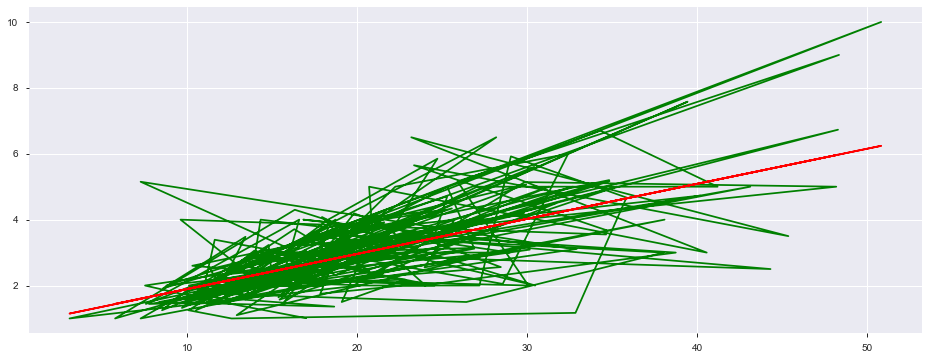

In [65]:
plt.plot(inputs_tb['total_bill'], outputs_tb, "g-")
plt.plot(inputs_tb['total_bill'], pred_tb, "r-")


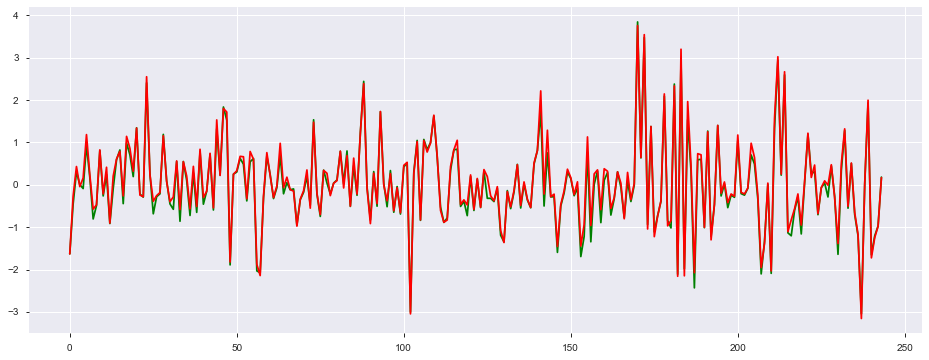

In [66]:
# Sample predictions
var_tbs=[]
var_tb=[]
for i in range(len(outputs_tbs)):
    var_tbs.append(outputs_tbs[i] - pred_tbs[i])
    var_tb.append(outputs_tb[i] - pred_tb[i])
plt.plot(var_tbs, "g-")
plt.plot(var_tb, "r-")


In [67]:
table = [["Mean", np.mean(var_tb), np.mean(var_tbs)], \
         ["Minimum", np.min(var_tb), np.min(var_tbs)], \
         ["Maximum", np.max(var_tb), np.max(var_tbs)], \
         ["Standard Devation", np.std(var_tb), np.std(var_tbs)]]
hdr = ["Category", "Total Bill Only", "Total Bill & Size"]
print(tabulate(table, headers = hdr,  tablefmt="grid"))

+-------------------+-------------------+---------------------+
| Category          |   Total Bill Only |   Total Bill & Size |
+===================+===================+=====================+
| Mean              |         0.0604339 |         -0.00572194 |
+-------------------+-------------------+---------------------+
| Minimum           |        -3.15633   |         -3.04484    |
+-------------------+-------------------+---------------------+
| Maximum           |         3.75983   |          3.84662    |
+-------------------+-------------------+---------------------+
| Standard Devation |         1.01792   |          1.00832    |
+-------------------+-------------------+---------------------+


Data is most meaningful when it is collected for a purpose. In that way you can state the conditions under which it is collected, what decisional information is to be garnered from the data etc. The data in this dataset is not gathered under such conditions and therefore any analysis will be tempered by the lack of understanding of its collection. 

The analysis itself may be taken from a number of different perspectives and tailored to suit the requirements. In the absence of such governing principles, it has been decided to see what we can infer from the existing data based on a number of assumptions. These assumptions will be stated from each perspective below. To start we will begin with the general analysis.

## General Analysis
**Assumptions:** None  


### References ###
[1] [Seaborn: Tips Dataset](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv).  
[2] [rdrr.io: Reggression Class - Tips](https://rdrr.io/cran/regclass/man/TIPS.html)  
[3] [Scipy Docs: scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)  
[4] [Jeff Heaton Introduction to Tensorflow](https://www.youtube.com/watch?v=PsE73jk55cE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN)  
[5] [Real Python: Linear Regression in Python](https://realpython.com/linear-regression-in-python/)  
[6] [Stack Overflow: Grouped Boxplot with Seaborn](https://stackoverflow.com/questions/39344167/grouped-boxplot-with-seaborn)  
[7] [Seaborn Tutorial: Regression](https://seaborn.pydata.org/tutorial/regression.html)  
[8] []()  